In [9]:
#py37 env
import numpy as np
from datetime import datetime, timedelta
import sys
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta
import os
import urllib.request
from multiprocessing import Pool
from tqdm import tqdm  
import datetime as dt
import matlab.engine
import multiprocessing
from joblib import Parallel, delayed
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import savemat

sys.path.append('./Tools')
from OC_nc2npz import ReadHYCOMData
from GeneralGeoTools import GetDepth

sys.path.append('./Tools/KitesMatlab')


from KitePortfolioTools import WriteMatlabInputs2Kites, TimeSeriesGeneration_Kite


# Write a MatlabFile with data from Hycom


 Calculating water depth at each point


100%|██████████| 280/280 [00:03<00:00, 74.64it/s]


Changing time discretization


100%|██████████| 2920/2920 [13:57<00:00,  3.48it/s]


Filling missing data


100%|██████████| 827/827 [00:00<00:00, 2590.12it/s]


Percentage of missing data filled:  1.5068493150684932
Plotting a sample time series


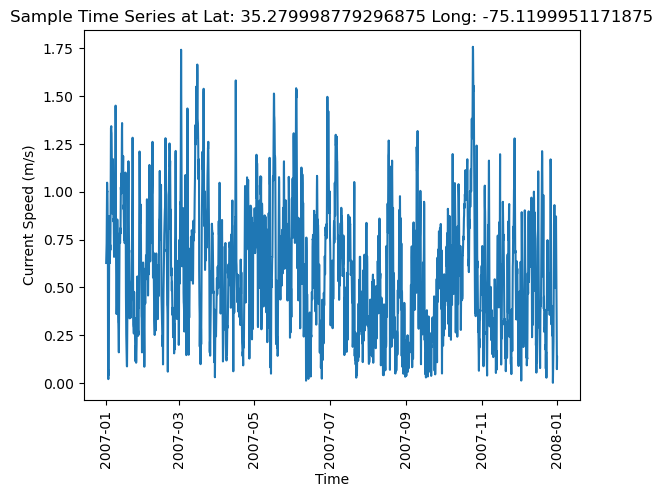

In [10]:
#Read Hycom and save a .mat file to be used in the Kites model from Dr. Vermillion's team

HycomPath="./InputData/OceanCurrent/RawHycomData_2007_2013.npz"
StartDTime=datetime(2007, 1, 1, 0, 0, 0) #datetime(2007, 1, 1, 0, 0, 0) 
EndDTime  =datetime(2007, 12, 31, 23, 0, 0) #datetime(2013, 12, 31, 23, 0, 0)

TimeDiscretization=3 #hours between each time step (averaging)
SaveMatPath="./InputData/OceanCurrent/"
FullMatlabHycomDataPath=SaveMatPath+"OCSpeedHycom_"+StartDTime.strftime("%Y%m%d")+"_"+EndDTime.strftime("%Y%m%d")+".mat"


#First Step is to create a matlab file with the data you want to work
WriteMatlabInputs2Kites (HycomPath, StartDTime, EndDTime, TimeDiscretization, SaveMatPath=SaveMatPath)

# Get Time Series of Energy Generation (from Matlab code)

In [11]:
PathKiteParams="./Tools/KitesMatlab/KiteParameters/power_objective.xlsx"
SavePowerTimeSeriesPath='./OutputData/OceanCurrent/'
BaseCSpeed=[0.5, 1 , 1.5 , 2.0 , 2.5]
VerticalDepth=[50, 100, 150, 200]


NumEnvs=10
MatlabKitePath='./Tools/KitesMatlab/'
for i_vd in tqdm(range(len(VerticalDepth))):# Vertical Depth Index
    for i_cs in range(len(BaseCSpeed)): #Base Current Speed Index
        TimeSeriesGeneration_Kite (PathKiteParams, i_vd, i_cs, SavePowerTimeSeriesPath, FullMatlabHycomDataPath, NumEnvs=10)

#TimeSeriesGeneration_Kite (PathKiteParams, 0, 1, SavePowerTimeSeriesPath, FullMatlabHycomDataPath,NumEnvs=10) 
# TimeSeriesGeneration_Kite (PathKiteParams, 0, 3, SavePowerTimeSeriesPath, FullMatlabHycomDataPath,NumEnvs=10) 

  0%|          | 0/4 [00:00<?, ?it/s]

Running Design: Vertical Depth Index: 0 --- Base Current Speed Index: 0
0.00 % complete
3.77 % complete
